In [3]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv("Car Price Dataset.zip")

In [5]:
df.head()

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
0,Mahindra Xuv500 (2013),W8 Dual Tone,DIESEL,"58,000 KM",MANUAL,1st Owner,"Pitampura, Delhi",01/27/2022,435000
1,Hyundai Creta (2020),1.6 SX Option Executive Diesel,DIESEL,43861.0 KM,MANUAL,1st Owner,"Ahiritola, Kolkata",01/23/2022,1165101
2,Hyundai Verna (2019),VTVT 1.4 EX,PETROL,"17,000 KM",MANUAL,2nd Owner,"Chelavoor, Pantheeramkavu",01/25/2022,815000
3,Datsun Redigo (2020),D,PETROL,10000 KM,MANUAL,1st Owner,"Palam, Delhi",01/13/2022,270000
4,Hyundai I10 (2011),Sportz 1.1 iRDE2,PETROL,70000 KM,MANUAL,1st Owner,"Dwarka Sector 13, Delhi",01/13/2022,185000


In [6]:
df = pd.DataFrame(data=df)
df.tail()

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
5045,maruti suzuki 800 (1970),EX 5 Speed,LPG,"500,000 Km",Automatic,1st Owner,Alipur,01/23/2022,50000
5046,renault duster (2012),2012-2015 110PS Diesel RxZ,Diesel,"111,000 Km",Manual,1st Owner,"MDDA Colony Near Kedarpuram, Dehradun",01/23/2022,320000
5047,hyundai santro (2021),Sportz AMT,Petrol,"5,500 Km",Automatic,1st Owner,"Pragati Nagar, Ahmedabad",01/23/2022,599000
5048,hyundai verna (2013),VTVT 1.6 EX,Petrol,61231.0 Km,Manual,1st Owner,"Malad West, Mumbai",01/27/2022,395000
5049,maruti suzuki swift dzire (2019),VXI,Diesel,"58,000 Km",Manual,1st Owner,"Kukatpally, Hyderabad",01/23/2022,580000


In [7]:
df.shape

(5050, 9)

In [8]:
df.dtypes

Brand & Model         object
Varient               object
Fuel Type             object
Driven Kilometers     object
Transmission          object
Owner                 object
Location              object
Date of Posting Ad    object
Price (in ₹)           int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand & Model       5050 non-null   object
 1   Varient             5011 non-null   object
 2   Fuel Type           5050 non-null   object
 3   Driven Kilometers   5050 non-null   object
 4   Transmission        5050 non-null   object
 5   Owner               5050 non-null   object
 6   Location            5050 non-null   object
 7   Date of Posting Ad  5050 non-null   object
 8   Price (in ₹)        5050 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 355.2+ KB


In [10]:
df.columns

Index(['Brand & Model', 'Varient', 'Fuel Type', 'Driven Kilometers',
       'Transmission', 'Owner', 'Location', 'Date of Posting Ad',
       'Price (in ₹)'],
      dtype='object')

In [11]:
df[df.duplicated()]

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
19,Mercedes-Benz S-Class (2004),S 350 L,PETROL,"52,300 KM",AUTOMATIC,2nd Owner,"JP Nagar, Bengaluru",01-27-2022,329000
28,Maruti Suzuki Alto 800 (2017),VXI Airbag,PETROL,"14,800 KM",MANUAL,1st Owner,"Chelavoor, Pantheeramkavu",01-27-2022,315000
30,Mahindra Scorpio (2020),S9,DIESEL,"18,000 KM",MANUAL,1st Owner,"Mirpur, Gurdaspur",01-27-2022,1775000
33,Hyundai Santro (2001),LE zipPlus,PETROL,115635.0 KM,MANUAL,4+ Owner,"Hebbal, Bengaluru",01-27-2022,73000
34,Hyundai Santro (2001),LE zipPlus,PETROL,115635.0 KM,MANUAL,4+ Owner,"Hebbal, Bengaluru",01-27-2022,73000
...,...,...,...,...,...,...,...,...,...
4326,2015 Maruti Wagon R 1.0,['VXI'],Petrol,"22,456 km",Manual,2nd Owner,"Akbar Hills, Hyderabad",05-01-2022,309699
4327,2019 Maruti Baleno,['LXI'],Petrol,"34,079 km",Automatic,1st Owner,"Vasai East, Mumbai",05-01-2022,326699
4328,2015 Hyundai Grand i10,['LXI'],Diesel,"86,636 km",Manual,1st Owner,"Nungambakkam, Chennai",05-01-2022,288699
4329,2013 Maruti Swift,['VXI'],Diesel,"29,449 km",Manual,1st Owner,"Rajouri Garden, Delhi",05-01-2022,555099


In [12]:
df.drop_duplicates(keep="first",inplace=True)

In [13]:
print("number of rows are",df.shape[0],"and number of columns are",df.shape[1])

number of rows are 2499 and number of columns are 9


In [14]:
df.describe()

,Price (in ₹)
count,2.499000e+03
mean,5.625344e+05
std,3.869627e+05
min,1.500000e+04
25%,3.653990e+05
50%,4.705990e+05
75%,6.462990e+05
max,7.175000e+06


In [15]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
x,y

(array([['W8 Dual Tone', 'DIESEL', '58,000 KM', ..., '1st Owner',
         'Pitampura, Delhi', '01/27/2022'],
        ['1.6 SX Option Executive Diesel', 'DIESEL', '43861.0 KM', ...,
         '1st Owner', 'Ahiritola, Kolkata', '01/23/2022'],
        ['VTVT 1.4 EX', 'PETROL', '17,000 KM', ..., '2nd Owner',
         'Chelavoor, Pantheeramkavu', '01/25/2022'],
        ...,
        ['Sportz AMT', 'Petrol', '5,500 Km', ..., '1st Owner',
         'Pragati Nagar, Ahmedabad', '01/23/2022'],
        ['VTVT 1.6 EX', 'Petrol', '61231.0 Km', ..., '1st Owner',
         'Malad West, Mumbai', '01/27/2022'],
        ['VXI', 'Diesel', '58,000 Km', ..., '1st Owner',
         'Kukatpally, Hyderabad', '01/23/2022']], dtype=object),
 array([ 435000, 1165101,  815000, ...,  599000,  395000,  580000],
       dtype=int64))

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
x_train,x_test

(array([["['TITANIUM']", 'Petrol', '19,412 km', ..., '1st Owner',
         'Andheri West, Mumbai', '01/17/2022'],
        ["['1.2']", 'Petrol', '6,054 km', ..., '1st Owner',
         'Brahmsthan, Azamgarh', '01/22/2022'],
        ['VX', 'DIESEL', '67,000 KM', ..., '1st Owner',
         'Police Lines, Varanasi', '01-27-2022'],
        ...,
        ["['VXI']", 'Diesel', '46,220 km', ..., '1st Owner',
         'Acharya Vihar, Bhubaneshwar', '05-01-2022'],
        ["['AMT']", 'Diesel', '46,949 km', ..., '1st Owner',
         'Janki Nagar, Patna', '06-01-2022'],
        ["['3.0']", 'Petrol', '27,905 km', ..., '1st Owner',
         'Chandigarh Airport Area, Chandigarh', '01/15/2022']],
       dtype=object),
 array([['Sharp DCT Automatic', 'PETROL', '28000.0 KM', ..., '1st Owner',
         'Indira Nagar, Bengaluru', '12-03-2021'],
        ["['PLUS']", 'Petrol', '18,277 km', ..., '2nd Owner',
         'Ahiritola, Kolkata', '06-01-2022'],
        ["['1.2']", 'Petrol', '22,197 km', ..., '1st Own

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], 
                                                    df.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749 entries, 4270 to 1005
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand & Model       1749 non-null   object
 1   Varient             1742 non-null   object
 2   Fuel Type           1749 non-null   object
 3   Driven Kilometers   1749 non-null   object
 4   Transmission        1749 non-null   object
 5   Owner               1749 non-null   object
 6   Location            1749 non-null   object
 7   Date of Posting Ad  1749 non-null   object
dtypes: object(8)
memory usage: 123.0+ KB


In [20]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [21]:

X_train["Varient"].value_counts()

['1.2']                  144
['VDI']                  110
['VXI']                   72
['LXI']                   51
['BS']                    41
                        ... 
LS B3 - 10 seats BSII      1
['EDITION']"               1
['1.2'                     1
['2WD']                    1
['HYBIRD']                 1
Name: Varient, Length: 288, dtype: int64

In [22]:
df

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
0,Mahindra Xuv500 (2013),W8 Dual Tone,DIESEL,"58,000 KM",MANUAL,1st Owner,"Pitampura, Delhi",01/27/2022,435000
1,Hyundai Creta (2020),1.6 SX Option Executive Diesel,DIESEL,43861.0 KM,MANUAL,1st Owner,"Ahiritola, Kolkata",01/23/2022,1165101
2,Hyundai Verna (2019),VTVT 1.4 EX,PETROL,"17,000 KM",MANUAL,2nd Owner,"Chelavoor, Pantheeramkavu",01/25/2022,815000
3,Datsun Redigo (2020),D,PETROL,10000 KM,MANUAL,1st Owner,"Palam, Delhi",01/13/2022,270000
4,Hyundai I10 (2011),Sportz 1.1 iRDE2,PETROL,70000 KM,MANUAL,1st Owner,"Dwarka Sector 13, Delhi",01/13/2022,185000
...,...,...,...,...,...,...,...,...,...
5045,maruti suzuki 800 (1970),EX 5 Speed,LPG,"500,000 Km",Automatic,1st Owner,Alipur,01/23/2022,50000
5046,renault duster (2012),2012-2015 110PS Diesel RxZ,Diesel,"111,000 Km",Manual,1st Owner,"MDDA Colony Near Kedarpuram, Dehradun",01/23/2022,320000
5047,hyundai santro (2021),Sportz AMT,Petrol,"5,500 Km",Automatic,1st Owner,"Pragati Nagar, Ahmedabad",01/23/2022,599000
5048,hyundai verna (2013),VTVT 1.6 EX,Petrol,61231.0 Km,Manual,1st Owner,"Malad West, Mumbai",01/27/2022,395000


In [23]:

X_train["Driven Kilometers"].value_counts()

1,22,416 km    5
76,778 km      5
68,356 km      5
1,14,506 km    5
1,12,006 km    5
              ..
140,000 KM     1
17,318 km      1
66,341 km      1
38,356 km      1
24,756 km      1
Name: Driven Kilometers, Length: 747, dtype: int64

In [24]:
df.isnull().sum()

Brand & Model         0
Varient               9
Fuel Type             0
Driven Kilometers     0
Transmission          0
Owner                 0
Location              0
Date of Posting Ad    0
Price (in ₹)          0
dtype: int64

Now there are no null values in the dataset.

<AxesSubplot:>

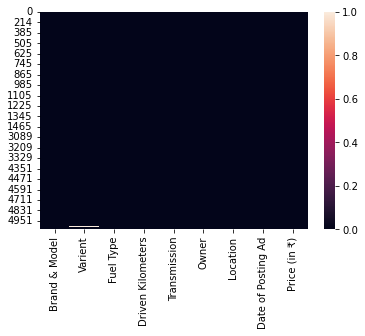

In [25]:
sn.heatmap(df.isnull())

This is the visualization of having just a small number null values in the dataset.

In [28]:
import seaborn as sns
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Varient']=imp.fit_transform(df['Varient'].values.reshape(-1,1)) 

<AxesSubplot:xlabel='Price (in ₹)'>

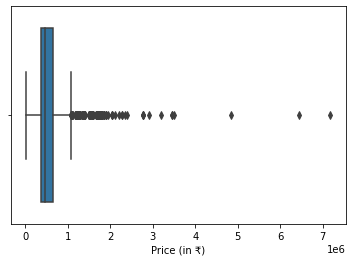

In [29]:
sns.boxplot(df["Price (in ₹)"])

<AxesSubplot:xlabel='Price (in ₹)', ylabel='Density'>

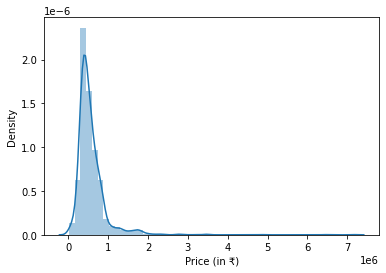

In [30]:
sns.distplot(df["Price (in ₹)"])

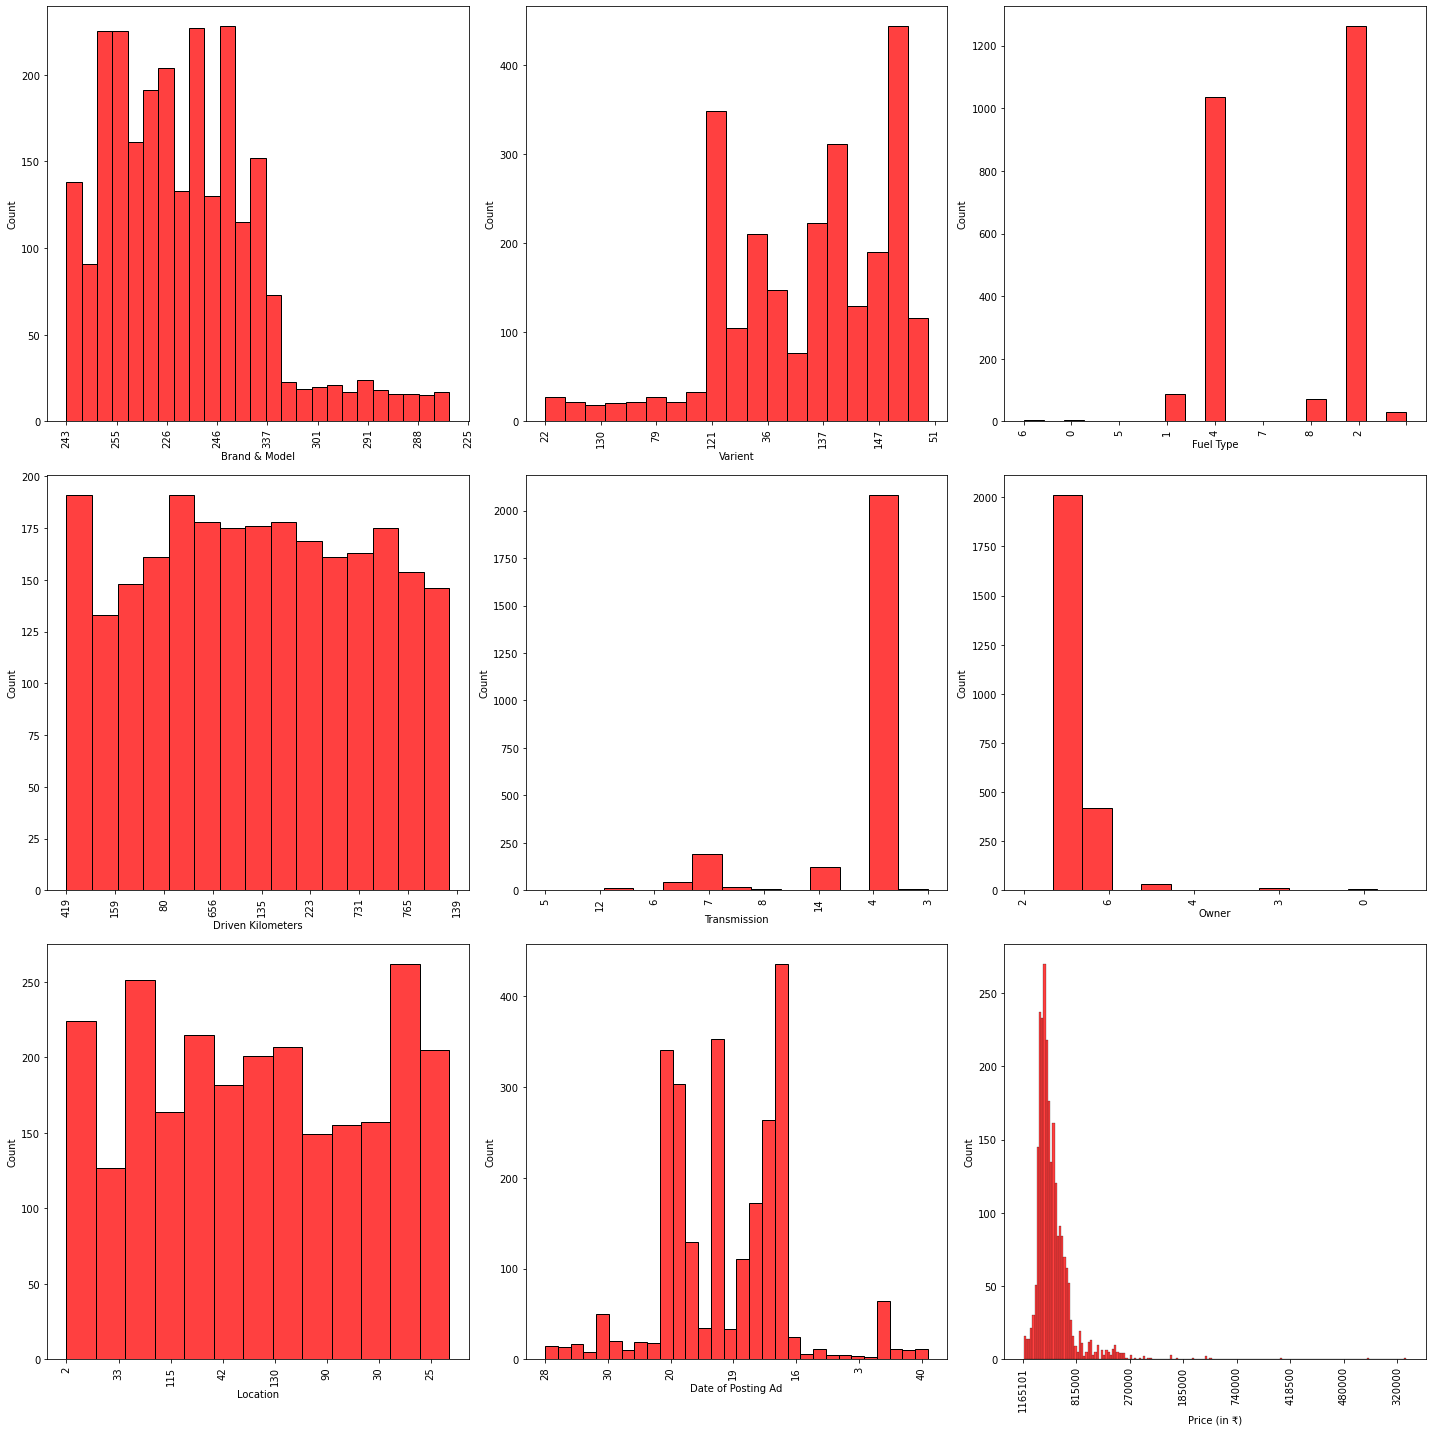

In [49]:
collist = df.columns.values
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(3,3,i+1)
    sn.histplot(data=df[collist[i]],color='red').set_xticklabels(labels=df[collist[i]].unique(),rotation=90)
    plt.tight_layout()

~ Brands, Varients, Driven Kilometers & Location have a wide range of values in them.

~ Maximum Cars run on either Petrol or diesel. Only few goes for CNG and other fuels.

~ Maximum Cars have Manual transnission.

~ Maximum cars are being sold by their very 1st Owner.

~ We have collected the cars posted online in last one month, from 25th December 2021 to 27th January 2022.

~ Almost all the cars have a price rnging in between 270000 to 1165101.

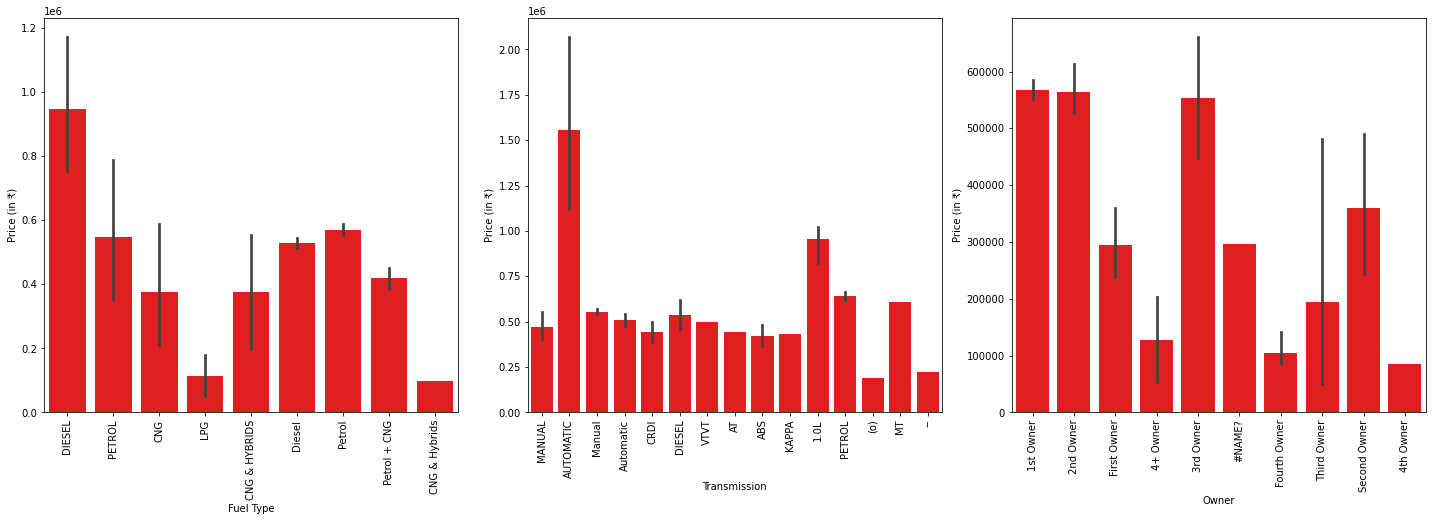

In [32]:
newcollist=['Fuel Type','Transmission','Owner']
plt.figure(figsize=(20,20))
for i in enumerate(newcollist):
    plt.subplot(3,3,i[0]+1)
    sn.barplot(data=df,x=i[1],y='Price (in ₹)',color='red')
    plt.xticks(rotation=90)
    plt.tight_layout()


since brand varient,DRIVEN KILOMETER & LOCATION HAVE A WIDE RANGE OF VALUES IN THEM WE WILL NOT PERFORM
BIVARIATE ANALYSIS FOR THEM AS THEY WILL NOT GIVE US ANY SPECIFIC DETAIL, NOW BY PLOTTING 
GRAPH OF FUEL TYPE,TRANSMISSION,AND OWNER AGAINST,PRICE WE CONCLUDE THAT CAR THAT USES DIESEL JHAVE AUTOMATIC TRANSMISSION AND HAS ONLY 1 OWNER IS MORE LIKELY TO HAVE A HIGH PRICE

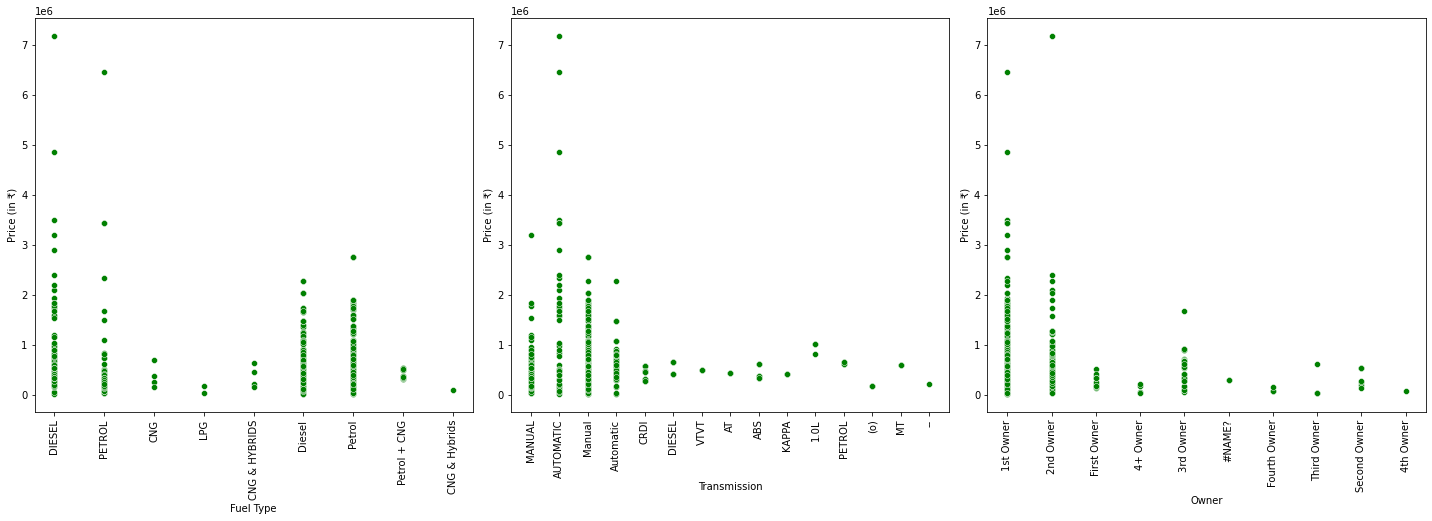

In [33]:
newcollist=["Fuel Type","Transmission","Owner"]
plt.figure(figsize=(20,20))
for i in enumerate(newcollist):
            plt.subplot(3,3,i[0]+1)
            sns.scatterplot(data=df,x=i[1],y="Price (in ₹)",color="green")
            plt.xticks(rotation=90)
            plt.tight_layout()
            
    

just like bar graph we can see that the price range is likely to be high for cars
usign diesel as fuel or having automatic Transmission os is only 1 owner

In [34]:
le = LabelEncoder()
for column in df.drop(["Price (in ₹)"],axis=1).columns:
    df[column]=le.fit_transform(df[column])

In [35]:
df

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
0,266,143,3,543,10,1,123,31,435000
1,243,22,3,419,10,1,2,28,1165101
2,255,130,6,159,10,2,33,30,815000
3,226,79,6,80,10,1,115,20,270000
4,246,121,6,656,10,1,42,20,185000
...,...,...,...,...,...,...,...,...,...
5045,358,87,5,484,6,1,6,28,50000
5046,375,56,4,97,12,1,81,28,320000
5047,351,122,7,472,6,1,126,28,599000
5048,353,131,7,586,12,1,87,31,395000


transforming  the data from object to oridinal type

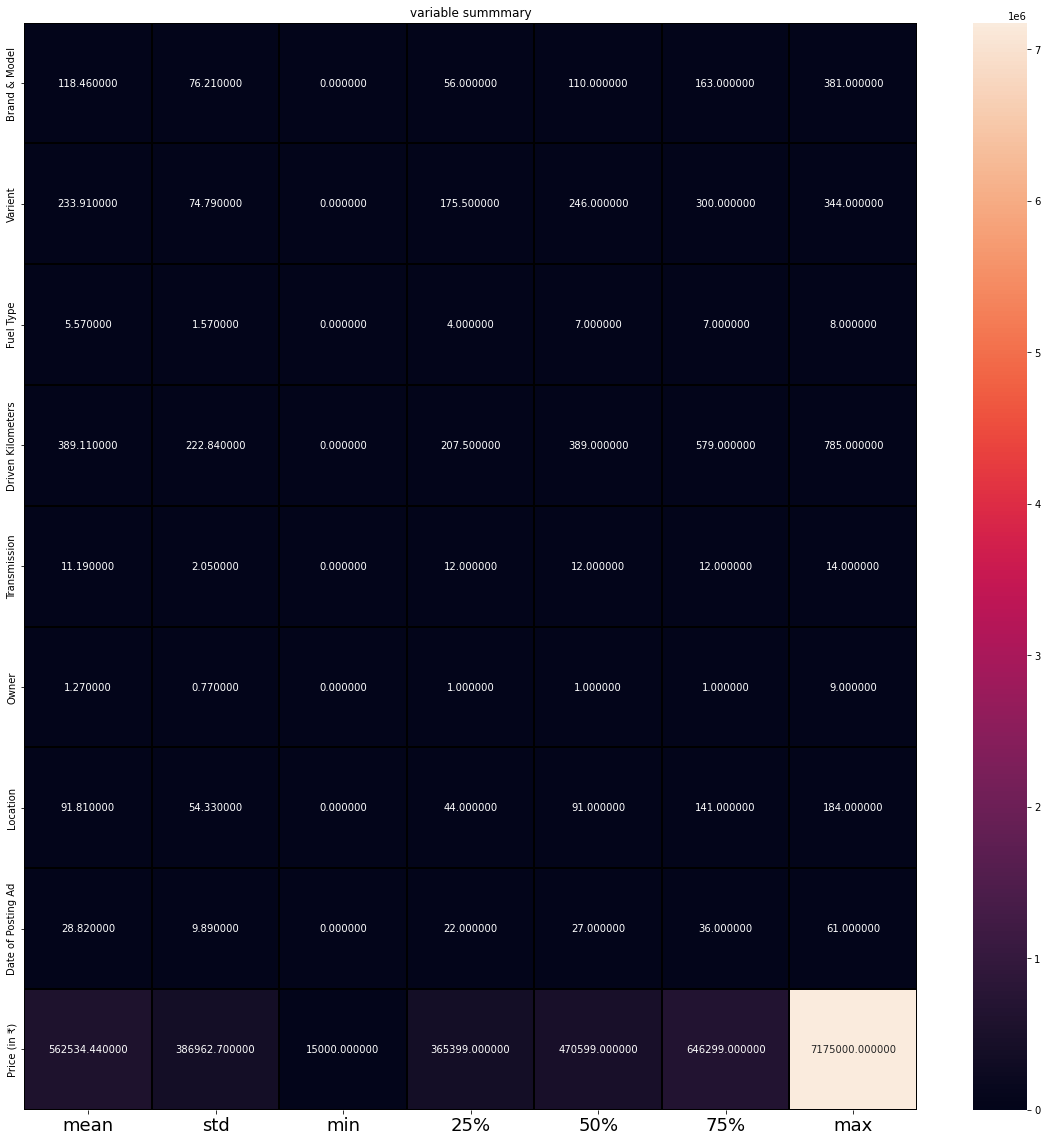

In [36]:
plt.figure(figsize=(20,20))
sn.heatmap(round(df.describe()[1:].transpose(),2),lw=2,linecolor='black',annot=True,fmt='f',color='red')
plt.xticks(fontsize=18)
plt.title("variable summmary")
plt.show()

it gives us the statistical summary(which includes mean median,standard deviation,mean,median,standard,minimum,value,maximum,value,and quartile,values,of all,the numerical columns)

<AxesSubplot:>

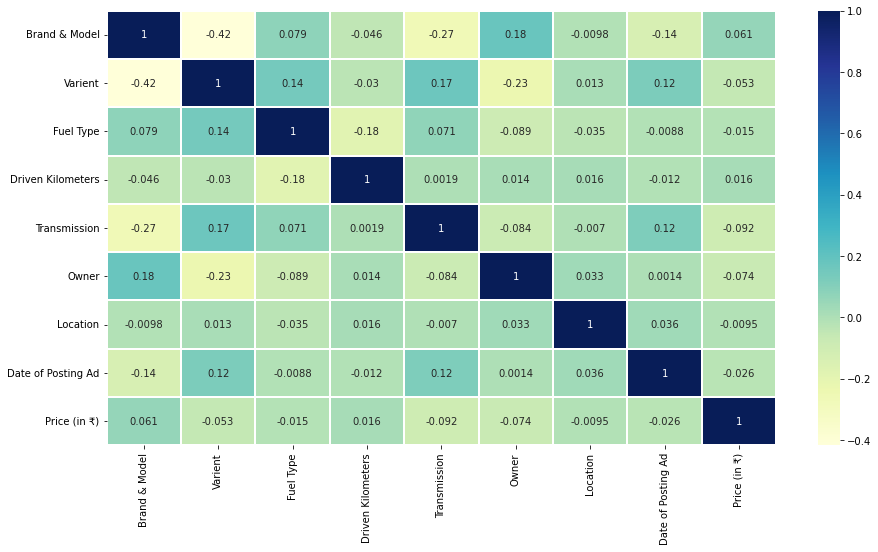

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidth=0.1,cmap="YlGnBu",annot=True)

THERE IS no multicollinearity in the dataset

            model building

In [38]:
x = df.drop(['Price (in ₹)'],axis=1)
y=df['Price (in ₹)']


In [39]:
x

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad
0,266,143,3,543,10,1,123,31
1,243,22,3,419,10,1,2,28
2,255,130,6,159,10,2,33,30
3,226,79,6,80,10,1,115,20
4,246,121,6,656,10,1,42,20
...,...,...,...,...,...,...,...,...
5045,358,87,5,484,6,1,6,28
5046,375,56,4,97,12,1,81,28
5047,351,122,7,472,6,1,126,28
5048,353,131,7,586,12,1,87,31


In [40]:
y

0        435000
1       1165101
2        815000
3        270000
4        185000
         ...   
5045      50000
5046     320000
5047     599000
5048     395000
5049     580000
Name: Price (in ₹), Length: 2499, dtype: int64

        Separating feature and target variables into x and y

In [41]:
x=power_transform(x,method='yeo-johnson')
scale = StandardScaler()
x=scale.fit_transform(x)

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 45)
svr = SVR()
svr.fit(xtrain,ytrain)
pred_train_svr=svr.predict(xtrain)
pred_test_svr=svr.predict(xtest)
print('SVR Regressor Score:',svr.score(xtrain,ytrain))
print('SVR Regressor r2_score:',r2_score(ytest,pred_test_svr))
print("Mean squared error of SVR Regressor:",mean_squared_error(ytest,pred_test_svr))
print("Root Mean Square error of SVR Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_svr)))


SVR Regressor Score: -0.057707526821044075
SVR Regressor r2_score: -0.05815415752533393
Mean squared error of SVR Regressor: 198143995947.31824
Root Mean Square error of SVR Regressor: 445133.6832315863


The Accuracy of SVR is in negative which stats that this is not the correct model to apply here.



In [43]:
lr= LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_
pred_train=lr.predict(xtrain)
pred_test=lr.predict(xtest)
print('Linear Regression Score:',lr.score(xtrain,ytrain))
print('Linear Regression r2_score:',r2_score(ytest,pred_test))
print("Mean squared error of Linear Regression:",mean_squared_error(ytest,pred_test))
print("Root Mean Square error of Linear Regression:",np.sqrt(mean_squared_error(ytest,pred_test)))


Linear Regression Score: 0.011243930593185625
Linear Regression r2_score: -0.0014498551229717993
Mean squared error of Linear Regression: 187525867212.95175
Root Mean Square error of Linear Regression: 433042.56974684575


The accuracy of Linear Regression is only 6%

In [44]:
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
pred_train_sgd=sgd.predict(xtrain)
pred_test_sgd=sgd.predict(xtest)
print('SGD Regressor Score:',sgd.score(xtrain,ytrain))
print('SGD Regressor r2_score:',r2_score(ytest,pred_test_sgd))
print("Mean squared error of SGD Regressor:",mean_squared_error(ytest,pred_test_sgd))
print("Root Mean Square error of SGD Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_sgd)))


SGD Regressor Score: 0.009399047201156585
SGD Regressor r2_score: -0.0030488790436067337
Mean squared error of SGD Regressor: 187825291438.61554
Root Mean Square error of SGD Regressor: 433388.15332057193


The accuracy of SGD Regressor is also very poor, it's only 6%



In [45]:
knr = KNeighborsRegressor()
knr.fit(xtrain,ytrain)
pred_train_knr=knr.predict(xtrain)
pred_test_knr=knr.predict(xtest)
print('K Neighbors Regressor Score:',knr.score(xtrain,ytrain))
print('K Neighbors Regressor r2_score:',r2_score(ytest,pred_test_knr))
print("Mean squared error of K Neighbors Regressor:",mean_squared_error(ytest,pred_test_knr))
print("Root Mean Square error of K Neighbors Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_knr)))


K Neighbors Regressor Score: 0.26898266221117806
K Neighbors Regressor r2_score: -0.052880619809568374
Mean squared error of K Neighbors Regressor: 197156502935.69092
Root Mean Square error of K Neighbors Regressor: 444023.0882912407


The accuracy of K Neighbors Regressor is 60% which is okay.

In [46]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
pred_train_dtr=dtr.predict(xtrain)
pred_test_dtr=dtr.predict(xtest)
print('Decision Tree Regressor Score:',dtr.score(xtrain,ytrain))
print('Decision Tree Regressor r2_score:',r2_score(ytest,pred_test_dtr))
print("Mean squared error of Decision Tree Regressor:",mean_squared_error(ytest,pred_test_dtr))
print("Root Mean Square error of Decision Tree Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_dtr)))


Decision Tree Regressor Score: 0.99303966360262
Decision Tree Regressor r2_score: 0.0008436935280067281
Mean squared error of Decision Tree Regressor: 187096390192.64
Root Mean Square error of Decision Tree Regressor: 432546.4023577586


The accuracy of Decision Tree Regressor is 80.2 % which is in acceptable range.



In [47]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
pred_train_rf=rf.predict(xtrain)
pred_test_rf=rf.predict(xtest)
print('Random Forest Regressor Score:',rf.score(xtrain,ytrain))
print('Random Forest Regressor r2_score:',r2_score(ytest,pred_test_rf))
print("Mean squared error of Random Forest Regressor:",mean_squared_error(ytest,pred_test_rf))
print("Root Mean Square error of Random Forest Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_rf)))


Random Forest Regressor Score: 0.8757249224396088
Random Forest Regressor r2_score: 0.28559810011606623
Mean squared error of Random Forest Regressor: 133774881616.87784
Root Mean Square error of Random Forest Regressor: 365752.48682254757


The accuracy of Random Forest Regressor is 87.56% which is quite good.



            Cross Validation Score

In [48]:
print("cross validation Score of SVR is ",(cvs(svr,x,y,cv=5).mean())*100)
print("cross validation Score of Linear Regression is ",(cvs(lr,x,y,cv=5).mean())*100)
print("cross validation Score of SGD Regressor is",(cvs(sgd,x,y,cv=5).mean())*100)
print("cross validation Score of KNeighbors Regressor is",(cvs(knr,x,y,cv=5).mean())*100)
print("cross validation Score of Decision Tree Regressor is",(cvs(dtr,x,y,cv=5).mean())*100)
print("cross validation Score of Random forest Regressor is ",(cvs(rf,x,y,cv=5).mean())*100)


cross validation Score of SVR is  -9.15767070233634
cross validation Score of Linear Regression is  -10.18209455620083
cross validation Score of SGD Regressor is -10.46156166148859
cross validation Score of KNeighbors Regressor is -26.200509525361575
cross validation Score of Decision Tree Regressor is -80.05597414567521
cross validation Score of Random forest Regressor is  -10.224416559773331


After comparing r2_score and Cross validation score, we will select Random Forest Regressor for Hyper Parameter Tuning.

HYPER PARAMETER TUNING

In [50]:
parameter={"bootstrap":[True,False],
    "max_features":["auto","sqrt"],
    'min_samples_leaf': [1, 2, 4],
    "min_samples_split":[2,5,10],}
gvc = GridSearchCV(RandomForestRegressor(),parameter,cv=5)
gvc.fit(xtrain,ytrain)
gvc.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5}

Getting all the best parameter to apply in our selected model.

In [51]:
pricecar = RandomForestRegressor(bootstrap=False,min_samples_leaf=1,max_features='sqrt',min_samples_split=2)
pricecar.fit(xtrain,ytrain)
pred=pricecar.predict(xtest)
acc=r2_score(ytest,pred)
print('Score of Hyper Parameter Tuned Ranfom Forest Regressor is:',pricecar.score(xtrain,ytrain))
print('Accuracy for predicting price of car is', (acc*100),'%')
print("Mean squared error of Hyper Parameter Tuned Random Forest Regressor:",mean_squared_error(ytest,pred))
print("Root Mean Square error of Hyper Parameter Tuned Random Forest Regressor:",np.sqrt(mean_squared_error(ytest,pred)))


Score of Hyper Parameter Tuned Ranfom Forest Regressor is: 0.99303966360262
Accuracy for predicting price of car is 23.807754521059866 %
Mean squared error of Hyper Parameter Tuned Random Forest Regressor: 142673313448.98813
Root Mean Square error of Hyper Parameter Tuned Random Forest Regressor: 377721.2112775613


The accuracy of Model 'PriceCar' (Random Forest Regressor) after applying Hyper Tuned Parameters is found to be 87.79% and the score is 0.98 which is quite good.

            Conclusion

In [52]:
a= np.array(ytest)
predicted = np.array(pricecar.predict(xtest))
Price=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
Price



,Original,Predicted
0,753199,655364.02
1,802399,508576.06
2,697499,575818.00
3,517099,459078.00
4,85000,156402.96
...,...,...
745,313499,611315.99
746,360099,422069.06
747,494799,430060.00
748,501699,739807.00


Here, we can see that all the predicted prices are either equal or nearly equal to the original prices of the car. Hence we conclude that our model 'pricecar' is working very well. And we shall save it for further use.

Model Saving


In [53]:
import pickle
filename = 'PriceCar.pkl'
pickle.dump(pricecar,open(filename,'wb'))
